## Load the data in dataframe

In [1]:
!wget http://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz

--2024-09-18 13:30:29--  http://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz
Resolving ai.stanford.edu (ai.stanford.edu)... 171.64.68.10
Connecting to ai.stanford.edu (ai.stanford.edu)|171.64.68.10|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 84125825 (80M) [application/x-gzip]
Saving to: ‘aclImdb_v1.tar.gz.2’

aclImdb_v1.tar.gz.2 100%[===================>]  80.23M  32.1MB/s    in 2.5s    

2024-09-18 13:30:32 (32.1 MB/s) - ‘aclImdb_v1.tar.gz.2’ saved [84125825/84125825]



In [2]:
!tar xvzf aclImdb_v1.tar.gz

Streaming output truncated to the last 5000 lines.
aclImdb/train/unsup/44983_0.txt
aclImdb/train/unsup/44982_0.txt
aclImdb/train/unsup/44981_0.txt
aclImdb/train/unsup/44980_0.txt
aclImdb/train/unsup/44979_0.txt
aclImdb/train/unsup/44978_0.txt
aclImdb/train/unsup/44977_0.txt
aclImdb/train/unsup/44976_0.txt
aclImdb/train/unsup/44975_0.txt
aclImdb/train/unsup/44974_0.txt
aclImdb/train/unsup/44973_0.txt
aclImdb/train/unsup/44972_0.txt
aclImdb/train/unsup/44971_0.txt
aclImdb/train/unsup/44970_0.txt
aclImdb/train/unsup/44969_0.txt
aclImdb/train/unsup/44968_0.txt
aclImdb/train/unsup/44967_0.txt
aclImdb/train/unsup/44966_0.txt
aclImdb/train/unsup/44965_0.txt
aclImdb/train/unsup/44964_0.txt
aclImdb/train/unsup/44963_0.txt
aclImdb/train/unsup/44962_0.txt
aclImdb/train/unsup/44961_0.txt
aclImdb/train/unsup/44960_0.txt
aclImdb/train/unsup/44959_0.txt
aclImdb/train/unsup/44958_0.txt
aclImdb/train/unsup/44957_0.txt
aclImdb/train/unsup/44956_0.txt
aclImdb/train/unsup/44955_0.txt
aclImdb/train/unsup/4

In [3]:
import os
def fetch_reviews(path):
  data=[]
  files=[f for f in os.listdir(path)]
  for file in files:
    with open(path+file,"r",encoding='utf-8') as f:
      data.append(f.read())
  return data

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df_train_pos=pd.DataFrame({'review':fetch_reviews('aclImdb/train/pos/'),'label':1})
df_train_neg=pd.DataFrame({'review':fetch_reviews('aclImdb/train/neg/'),'label':0})
df_test_pos=pd.DataFrame({'review':fetch_reviews('aclImdb/test/pos/'),'label':1})
df_test_neg=pd.DataFrame({'review':fetch_reviews('aclImdb/test/neg/'),'label':0})

df=pd.concat([df_train_pos,df_train_neg,df_test_pos,df_test_neg],ignore_index=True)

## Preprocessing

In [5]:
print("Total reviews in df: ",df.shape)
df.head()

Total reviews in df:  (50000, 2)


,review,label
0,Young Erendira and her tyrranical Grandmother ...,1
1,"To me this was more a wake up call, and realiz...",1
2,"Hilarious, evocative, confusing, brilliant fil...",1
3,For starters I have always been a fan of the B...,1
4,Little Edie and Big Edie are characters that a...,1


In [6]:
df.isna().sum()

,0
review,0
label,0


### remove HTML tags from reviews

In [7]:
import re
def remove_tags(review):
  cleaned_review= re.sub(re.compile('<.*?>'),',',review)
  cleaned_review=re.sub('[^A-Za-z0-9/]+', ' ' ,cleaned_review)
  return cleaned_review.lower()
df['review']=df['review'].apply(remove_tags)
df.head()

,review,label
0,young erendira and her tyrranical grandmother ...,1
1,to me this was more a wake up call and realiza...,1
2,hilarious evocative confusing brilliant film r...,1
3,for starters i have always been a fan of the b...,1
4,little edie and big edie are characters that a...,1


### Tokinization and lemmatization

In [8]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [9]:
stop_words=stopwords.words('english')
stop_words.remove('not')
def pre_processing(review):
  token= word_tokenize(review)

  filtered_token= [word for word in token if word not in stop_words]

  lemmatizer= WordNetLemmatizer()
  filtered_token_after_lemm= [lemmatizer.lemmatize(word) for word in filtered_token]
  return ' '.join(filtered_token_after_lemm)

print("original:\t\t"+df['review'][0])
print("after preprocessing:\t"+pre_processing(df['review'][0]))

original:		young erendira and her tyrranical grandmother provide for a great fantasy from the new world this interpretation of gabriel garcia marquez la incr ible y triste historia da la c ndida er ndira may not rub marquez purists the right way eventhough the story stays intact and still carries the full force of the work the strength of this film is in its acting especially papas as the grandmother marquez fans and marquez novices alike will enjoy this movie for its real gritty brand of witt 
after preprocessing:	young erendira tyrranical grandmother provide great fantasy new world interpretation gabriel garcia marquez la incr ible triste historia da la c ndida er ndira may not rub marquez purist right way eventhough story stay intact still carry full force work strength film acting especially papa grandmother marquez fan marquez novice alike enjoy movie real gritty brand witt


In [10]:
df['processed_review'] = df['review'].apply(pre_processing)

In [11]:
df.head()

,review,label,processed_review
0,young erendira and her tyrranical grandmother ...,1,young erendira tyrranical grandmother provide ...
1,to me this was more a wake up call and realiza...,1,wake call realization see hear read think anyt...
2,hilarious evocative confusing brilliant film r...,1,hilarious evocative confusing brilliant film r...
3,for starters i have always been a fan of the b...,1,starter always fan batman cartoon theme univer...
4,little edie and big edie are characters that a...,1,little edie big edie character anyone feel com...


### Positive and negative word

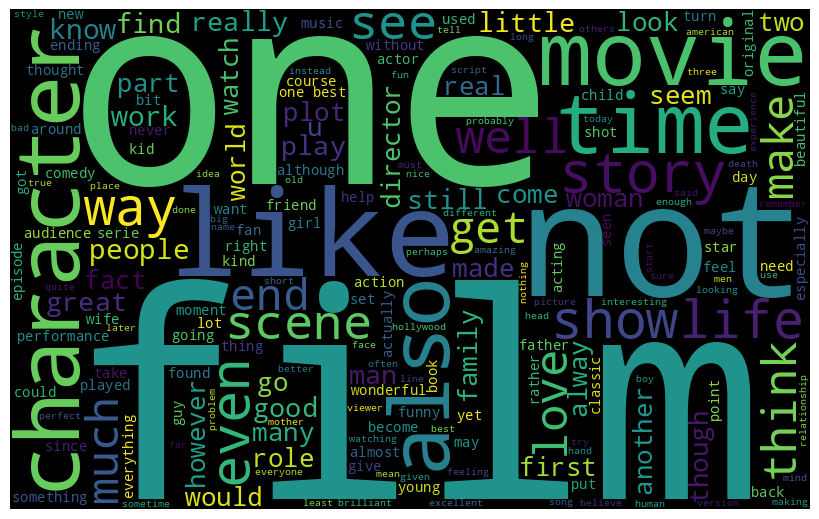

In [12]:
from wordcloud import WordCloud
words_list = df[df['label']==1]['processed_review'].unique().tolist()
pos_words = " ".join(words_list)

pos_wordcloud =  WordCloud(
                  width=800, height = 500,
                  stopwords=stop_words).generate(pos_words)

plt.figure(figsize=(8, 8), facecolor = None)
plt.imshow(pos_wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

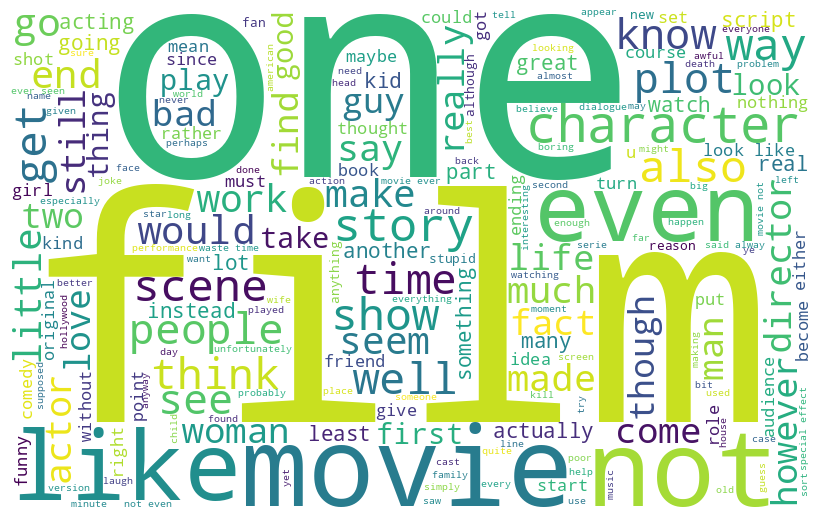

In [13]:
from wordcloud import WordCloud
words_list = df[df['label']==0]['processed_review'].unique().tolist()
neg_words = " ".join(words_list)

neg_wordcloud =  WordCloud(
                  width=800, height = 500,background_color='white',
                  stopwords=stop_words).generate(neg_words)

plt.figure(figsize=(8, 8), facecolor = None)
plt.imshow(neg_wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()


### Split the data to (70-30) train and test

In [14]:
from sklearn.model_selection import train_test_split
X=df['processed_review']
y=df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=7)

print("Train data size ",X_train.shape[0])
print("Test data size ",X_test.shape[0])

Train data size  35000
Test data size  15000


## CountVector

In [15]:
from sklearn.feature_extraction.text import CountVectorizer

vectorize= CountVectorizer(min_df=10)

count_vector_train= vectorize.fit_transform(X_train)
count_vector_test= vectorize.transform(X_test)

### TF-IDF

In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer

TF= TfidfVectorizer(min_df=10)

TF_train= TF.fit_transform(X_train)
TF_test =TF.transform(X_test)

# 4. Building ML Classifiers

## LogisticRegression with countVector

In [19]:
# from sklearn.linear_model import LogisticRegression
# from sklearn.preprocessing import StandardScaler
# from sklearn.pipeline import Pipeline
# from sklearn.model_selection import GridSearchCV
# steps=[
#     ('vectorize',CountVectorizer()),
#       ('model',LogisticRegression())
#       ]
# parameters = {'model__C': np.logspace(-3, 3, 7),
#               'model__penalty':['l2', 'l1'],
#               'model__max_iter':[100,1000,3000,10000]
#               }
# pipeline = Pipeline(steps)
# grid = GridSearchCV(pipeline, param_grid=parameters, cv=5)
# grid.fit(X_train, y_train)
# print("Best CV params", grid.best_params_)
# print("Best CV accuracy", grid.best_score_)
# print("Test accuracy of best grid search hypers:", grid.score(X_test, y_test))

Best CV params {'**model__C**': 0.1, '**model__max_iter**': 100, '**model__penalty**': 'l2'}

Best CV accuracy **0.8873142857142857**

Test accuracy of best grid search hypers:** 0.8904**

In [20]:
from sklearn.linear_model import LogisticRegression

Logistic_vector_model=LogisticRegression(random_state=5,C=0.1,max_iter=100,penalty='l2').fit(count_vector_train,y_train)
Logistic_vector_model.score(count_vector_test,y_test)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.8879333333333334

In [21]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
def plot_confusion_matrix(model,x,y):
    y_pred=model.predict(x)
    cm=confusion_matrix(y_true=y,y_pred=y_pred)

    disp=ConfusionMatrixDisplay(cm,display_labels= model.classes_)
    disp.plot()
    plt.show()

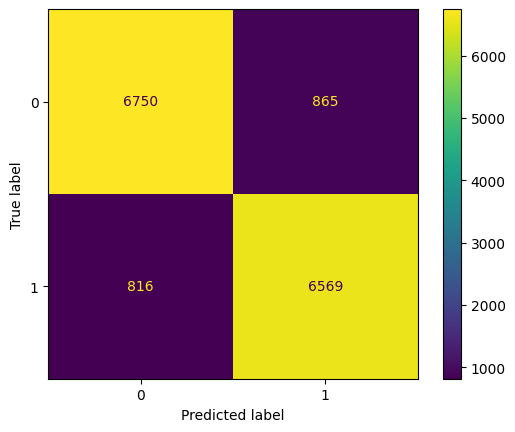

In [22]:
plot_confusion_matrix(Logistic_vector_model , count_vector_test , y_test)

In [23]:
from sklearn.metrics import f1_score,recall_score,precision_score
def my_scores(model,x,y):
    y_pred=model.predict(x)
    f_score=f1_score(y,y_pred,average='weighted')
    recall=recall_score(y,y_pred,average='weighted')
    precision=precision_score(y,y_pred,average='weighted')

    print('f1_score :',f_score)
    print('recall :' ,recall)
    print('precision :',precision)

In [24]:
my_scores(Logistic_vector_model , count_vector_test , y_test)

f1_score : 0.887937751395586
recall : 0.8879333333333334
precision : 0.8879611207936389


# Logistic Regression with TFIDF

In [25]:
from sklearn.linear_model import LogisticRegression

Logistic_TF_model=LogisticRegression(random_state=5,penalty='l2').fit(TF_train,y_train)
Logistic_TF_model.score(TF_test,y_test)


0.8916666666666667

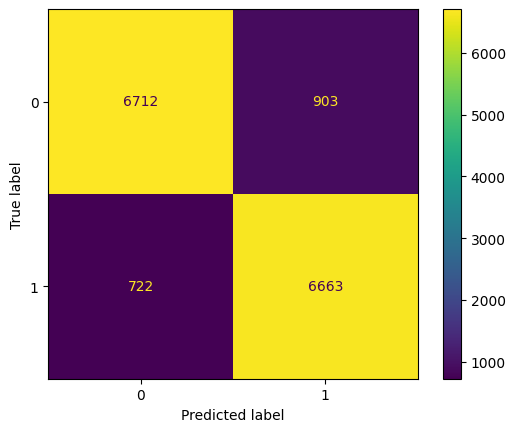

In [26]:
plot_confusion_matrix(Logistic_TF_model , TF_test , y_test)

In [27]:
my_scores(Logistic_TF_model , TF_test , y_test)

f1_score : 0.8916709369714948
recall : 0.8916666666666667
precision : 0.8919348892155986


## RandomForst with countVector

In [28]:
from sklearn.ensemble import RandomForestClassifier

random_forest_count_model = RandomForestClassifier(random_state=7,max_depth=10)
random_forest_count_model.fit(count_vector_train, y_train)
random_forest_count_model.score(count_vector_test, y_test)

0.8266

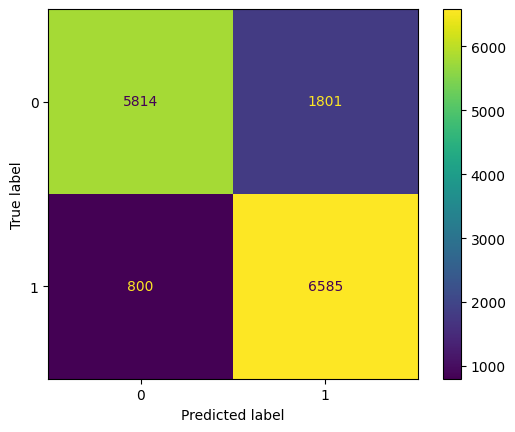

In [29]:
plot_confusion_matrix(random_forest_count_model , count_vector_test , y_test)

In [30]:
my_scores(random_forest_count_model , count_vector_test , y_test)

f1_score : 0.8260036462733081
recall : 0.8266
precision : 0.8328600638701837


## RandomForst with TFIDF

In [31]:
from sklearn.ensemble import RandomForestClassifier

random_forest_TF_model = RandomForestClassifier(random_state=7,max_depth=10)
random_forest_TF_model.fit(TF_train, y_train)
random_forest_TF_model.score(TF_test, y_test)

0.8254666666666667

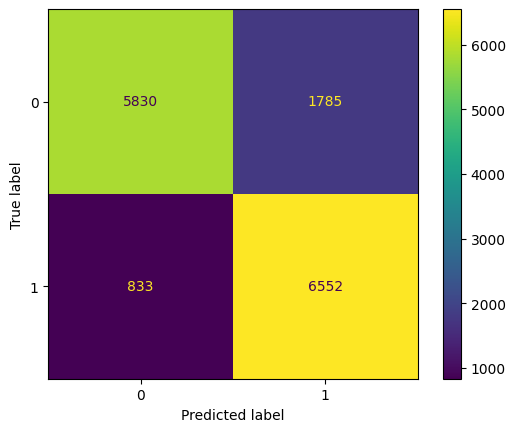

In [32]:
plot_confusion_matrix(random_forest_TF_model , TF_test , y_test)

In [33]:
my_scores(random_forest_TF_model , TF_test , y_test)

f1_score : 0.8249322532416242
recall : 0.8254666666666667
precision : 0.8311207237028223


## SVM with TFIDF

In [32]:
from sklearn.svm import SVC

svm_model= SVC(random_state=7)
svm_model.fit(TF_train, y_train)
svm_model.score(TF_test, y_test)

0.8968

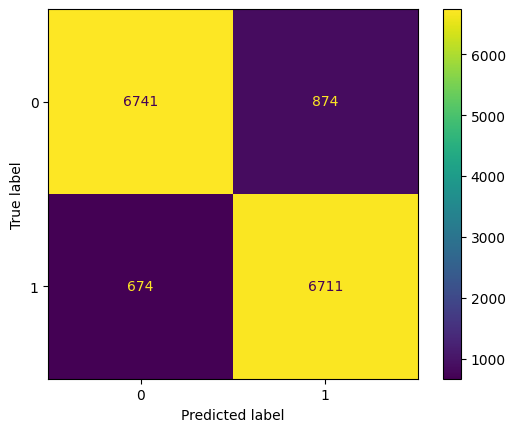

In [33]:
plot_confusion_matrix(svm_model , TF_test , y_test)

In [34]:
my_scores(svm_model ,TF_test ,y_test)

f1_score : 0.896802752011008
recall : 0.8968
precision : 0.8971244078906135


## DNN with TFIDF

In [17]:
from keras import Sequential
from keras.layers import Dense,Dropout
import keras

call_back = keras.callbacks.EarlyStopping(monitor='val_loss', patience=5,restore_best_weights=True)
DNN_model = Sequential([
    Dense(128, activation='relu',input_shape=[TF_train.shape[1]],kernel_regularizer=keras.regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(64, activation='relu',kernel_regularizer=keras.regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
    ]
)
DNN_model.compile(loss = 'binary_crossentropy', optimizer='adam', metrics=['accuracy'])
DNN_model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │       2,508,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,516,481 (9.60 MB)

 Trainable params: 2,516,481 (9.60 MB)

 Non-trainable params: 0 (0.00 B)

In [19]:
history = DNN_model.fit(TF_train, y_train, epochs=100, batch_size=512,validation_data=(TF_test, y_test),callbacks=[call_back])

Epoch 1/100
69/69 ━━━━━━━━━━━━━━━━━━━━ 12s 167ms/step - accuracy: 0.7950 - loss: 0.8506 - val_accuracy: 0.8480 - val_loss: 0.7127
Epoch 2/100
69/69 ━━━━━━━━━━━━━━━━━━━━ 19s 141ms/step - accuracy: 0.8356 - loss: 0.6942 - val_accuracy: 0.8614 - val_loss: 0.6471
Epoch 3/100
69/69 ━━━━━━━━━━━━━━━━━━━━ 11s 153ms/step - accuracy: 0.8495 - loss: 0.6442 - val_accuracy: 0.8666 - val_loss: 0.6217
Epoch 4/100
69/69 ━━━━━━━━━━━━━━━━━━━━ 17s 103ms/step - accuracy: 0.8574 - loss: 0.6228 - val_accuracy: 0.8691 - val_loss: 0.6096
Epoch 5/100
69/69 ━━━━━━━━━━━━━━━━━━━━ 6s 80ms/step - accuracy: 0.8622 - loss: 0.6109 - val_accuracy: 0.8705 - val_loss: 0.5966
Epoch 6/100
69/69 ━━━━━━━━━━━━━━━━━━━━ 6s 88ms/step - accuracy: 0.8637 - loss: 0.6039 - val_accuracy: 0.8747 - val_loss: 0.5878
Epoch 7/100
69/69 ━━━━━━━━━━━━━━━━━━━━ 10s 83ms/step - accuracy: 0.8703 - loss: 0.5897 - val_accuracy: 0.8739 - val_loss: 0.5807
Epoch 8/100
69/69 ━━━━━━━━━━━━━━━━━━━━ 10s 74ms/step - accuracy: 0.8668 - loss: 0.5863 - val_ac

<Axes: >

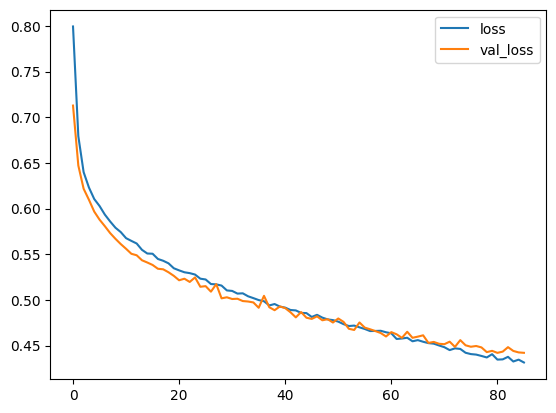

In [20]:
history_df = pd.DataFrame(history.history)
history_df[['loss','val_loss']].plot()

In [21]:
DNN_model.evaluate(TF_test, y_test)

469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.8916 - loss: 0.4370


[0.4419935345649719, 0.8887333273887634]

In [26]:
from prettytable import PrettyTable

x = PrettyTable()

x.field_names = ['Vectorizer', 'Model', 'Accuracy']
x.add_row(['BOW', 'Logistic Regression', '88.92%'])
x.add_row(['TFIDF', 'Logistic Regression', '89%'])
x.add_row(['BOW', 'Random Forest', '82.2%'])
x.add_row(['TFIDF', 'Random Forest', '82.5%'])
x.add_row(['TFIDF', 'SVM', '89.5%'])
x.add_row(['TFIDF', 'DNN', '88.9%'])
print(x)

+------------+---------------------+----------+
| Vectorizer |        Model        | Accuracy |
+------------+---------------------+----------+
|    BOW     | Logistic Regression |  88.92%  |
|   TFIDF    | Logistic Regression |   89%    |
|    BOW     |    Random Forest    |  82.2%   |
|   TFIDF    |    Random Forest    |  82.5%   |
|   TFIDF    |         SVM         |  89.5%   |
|   TFIDF    |         DNN         |  88.9%   |
+------------+---------------------+----------+
